# PHYS 243 Final Project

In [2]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

## 1-Neural Networks

In [123]:
nn_df = pd.read_csv("train_set.txt")
nn_df.head()

,16.263398281940148,13.29920590463558,r
0,0.775408,23.986692,r
1,29.170503,-3.287474,r
2,6.739044,-28.033329,r
3,3.216100,22.013695,r
4,47.374906,7.925541,g


### Data Cleaning and Preprocessing

In [124]:
# Add column names

nn_df.columns = ["X1", "X2", "Class"]
nn_df.head()

,X1,X2,Class
0,0.775408,23.986692,r
1,29.170503,-3.287474,r
2,6.739044,-28.033329,r
3,3.216100,22.013695,r
4,47.374906,7.925541,g


In [125]:
# Create and add new feature columns (X3, X4, X5)

nn_df["X3"] = nn_df["X1"]**2
nn_df["X4"] = nn_df["X2"]**2
nn_df["X5"] = nn_df["X1"] * nn_df["X2"]

# Reorder columns
nn_df = nn_df[["X1", "X2", "X3", "X4", "X5", "Class"]]
nn_df.head()

,X1,X2,X3,X4,X5,Class
0,0.775408,23.986692,0.601257,575.361405,18.599466,r
1,29.170503,-3.287474,850.918251,10.807487,-95.897279,r
2,6.739044,-28.033329,45.414707,785.867535,-188.917824,r
3,3.216100,22.013695,10.343297,484.602776,70.798239,r
4,47.374906,7.925541,2244.381691,62.814197,375.471748,g


In [126]:
# Standardize the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
nn_df[["X1", "X2", "X3", "X4", "X5"]] = scaler.fit_transform(nn_df[["X1", "X2", "X3", "X4", "X5"]])
nn_df.head()

,X1,X2,X3,X4,X5,Class
0,0.010670,1.220504,-0.797023,0.454172,0.042570,r
1,1.510480,-0.231514,1.095179,-0.703876,-0.325935,r
2,0.325666,-1.548931,-0.697300,0.885975,-0.625319,r
3,0.139586,1.115466,-0.775345,0.268002,0.210570,r
4,2.472024,0.365443,4.196041,-0.597197,1.191154,g


In [214]:
# Replace the class labels with integers
nn_df["Class"] = nn_df["Class"].replace({"r": 0, "g": 1, "b": 2})
nn_df["Class"].unique()

array([0, 1, 2])

### Model Training [X3, X4]

In [189]:
# Seperate features and target variable
X = nn_df.drop(columns=["X1", "X2", "X5","Class"])
y = nn_df["Class"]

In [190]:
X.shape, y.shape

((684, 2), (684,))

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(547, 2)
(137, 2)
(547,)
(137,)


In [192]:
from sklearn.neural_network import MLPClassifier
mpl = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000, random_state=42, alpha=0.01)
mpl.fit(X_train, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(5, 5), max_iter=1000,
              random_state=42)

In [193]:
y_pred = mpl.predict(X_test)
y_pred

array(['r', 'r', 'r', 'r', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'r', 'g', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'g', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'g', 'r', 'g', 'r', 'r', 'r', 'g', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r'], dtype='<U1')

In [194]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           b       0.00      0.00      0.00        16
           g       1.00      1.00      1.00        11
           r       0.87      1.00      0.93       110

    accuracy                           0.88       137
   macro avg       0.62      0.67      0.64       137
weighted avg       0.78      0.88      0.83       137

Accuracy:  0.8832116788321168


### Model Training [X3, X5]

In [180]:
# Seperate features and target variable
X = nn_df.drop(columns=["X1", "X2", "X4","Class"])
y = nn_df["Class"]

In [181]:
X.shape, y.shape

((684, 2), (684,))

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(547, 2)
(137, 2)
(547,)
(137,)


In [183]:
mpl.fit(X_train, y_train)

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(5, 5),
              max_iter=1000, random_state=42)

In [184]:
y_pred = mpl.predict(X_test)
y_pred

array(['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'g', 'r', 'g', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'g', 'r', 'r', 'r', 'r', 'r', 'b', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r'], dtype='<U1')

In [185]:
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           b       0.00      0.00      0.00        16
           g       0.62      0.45      0.53        11
           r       0.84      0.97      0.90       110

    accuracy                           0.82       137
   macro avg       0.49      0.48      0.48       137
weighted avg       0.73      0.82      0.77       137

Accuracy:  0.8175182481751825


### Model Training [X3, X4, X5]

In [166]:
# Seperate features and target variable
X = nn_df.drop(columns=["X1", "X2","Class"])
y = nn_df["Class"]

In [167]:
X.shape, y.shape

((684, 3), (684,))

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(547, 3)
(137, 3)
(547,)
(137,)


In [169]:
mpl.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(5, 5), max_iter=1000,
              random_state=42)

In [170]:
y_pred = mpl.predict(X_test)
y_pred

array(['r', 'r', 'r', 'r', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'b', 'r', 'r', 'b', 'r', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'g', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'b', 'r', 'r', 'g', 'r', 'g', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'g', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'b', 'r', 'b', 'r', 'r', 'b', 'r', 'r',
       'r', 'r', 'r', 'r', 'b', 'r', 'b', 'r', 'r', 'g', 'r', 'r', 'r',
       'r', 'b', 'b', 'r', 'b', 'r', 'r', 'r', 'r', 'r', 'b', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'b', 'r', 'r', 'g', 'r', 'g', 'r', 'r', 'r', 'g', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'b', 'r'], dtype='<U1')

In [171]:
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           b       1.00      1.00      1.00        16
           g       1.00      1.00      1.00        11
           r       1.00      1.00      1.00       110

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137

Accuracy:  1.0


### Model Training [X1, X2, X3, X4, X5]

In [145]:
# Seperate features and target variable
X = nn_df.drop("Class", axis=1)
y = nn_df["Class"]

In [146]:
X.shape, y.shape

((684, 5), (684,))

In [147]:
mpl.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000, random_state=42)

In [148]:
y_pred = mpl.predict(X_test)
y_pred

array(['r', 'r', 'r', 'r', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'b', 'r', 'r', 'b', 'r', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'g', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'b', 'r', 'r', 'g', 'r', 'g', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'g', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'b', 'r', 'b', 'r', 'r', 'b', 'r', 'r',
       'r', 'r', 'r', 'r', 'b', 'r', 'b', 'r', 'r', 'g', 'r', 'r', 'r',
       'r', 'b', 'b', 'r', 'b', 'r', 'r', 'r', 'r', 'r', 'b', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'b', 'r', 'r', 'g', 'r', 'g', 'r', 'r', 'r', 'g', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'b', 'r'], dtype='<U1')

In [149]:
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           b       1.00      1.00      1.00        16
           g       1.00      1.00      1.00        11
           r       1.00      1.00      1.00       110

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137

Accuracy:  1.0


### Keras Neural Network 

In [205]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [215]:
X = nn_df.drop(columns=["X1", "X2", "X5","Class"])
y = nn_df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [216]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547 entries, 439 to 102
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X3      547 non-null    float64
 1   X4      547 non-null    float64
dtypes: float64(2)
memory usage: 12.8 KB


In [220]:
y_train = y_train.astype("int")
y_train.info()

<class 'pandas.core.series.Series'>
Index: 547 entries, 439 to 102
Series name: Class
Non-Null Count  Dtype
--------------  -----
547 non-null    int64
dtypes: int64(1)
memory usage: 8.5 KB


In [ ]:
# Test [X3, X4]
model = models.Sequential()
model.add(layers.Dense(5, activation="relu", input_shape=(4,)))
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)
predictions = model.predict(X_test)
predictions = [1 if x > 0.5 else 0 for x in predictions]
print(classification_report(y_test, predictions))
print("Accuracy: ", accuracy_score(y_test, predictions))

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_21" is incompatible with the layer: expected axis -1 of input shape to have value 4, but received input with shape (None, 2)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 2), dtype=float32)
  • training=True
  • mask=None

## 2-Twitter Sentiment Analysis Dataset
- Apply PCA
- Use validation dataset

In [3]:
train_df = pd.read_csv('twitter_training.csv')
test_df = pd.read_csv('twitter_validation.csv')

### Data Cleaning/ Preprocessing

In [4]:
train_df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
test_df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [6]:
train_df.duplicated().sum()

2700

In [7]:
test_df.duplicated().sum()

0

In [8]:
train_df.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [9]:
test_df.isnull().sum()

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: i

In [10]:
train_df.isna().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [11]:
test_df.isna().sum()

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: i

##### Add new column names to both training and testing datasets

In [12]:
# Set new column names for both training and validation datasets
column_names = ["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"]

train_df.columns = column_names
test_df.columns = column_names

In [13]:
train_df.head(2)

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...


In [14]:
test_df.head(2)

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...


In [15]:
# filled NA rows under the Tweet_Content column as empty strings
train_df['Tweet_Content'].fillna('', inplace=True)
train_df.isna().sum()

Tweet_ID         0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64

In [16]:
train_df.shape

(74681, 4)

In [17]:
test_df.shape

(999, 4)

Issue: Both testing and validation datasets are missing a column header row. Additionally, the training dataset has 2700 duplicated rows

##### Removed duplicates from training dataset
- Note: Although the "Tweet_ID" column does not have unique values per row, it is not relevant in modeling since we often leave out unique identifiers out (left as is)

In [18]:
train_df.duplicated().sum()

2700

In [19]:
train_df.drop_duplicates(inplace=True)

In [20]:
train_df.duplicated().sum()

0

In [21]:
train_df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [22]:
train_df.shape

(71981, 4)

##### Change "Irrelevant" to "Neutral" for the Sentiment column

In [23]:
train_df['Sentiment'].value_counts()

Sentiment
Negative      21787
Positive      19810
Neutral       17800
Irrelevant    12584
Name: count, dtype: int64

In [24]:
test_df['Sentiment'].value_counts()

Sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: count, dtype: int64

In [25]:
# Replacing the "Irrelevant" sentiment with "Neutral" in the training dataset
train_df.loc[train_df["Sentiment"] == "Irrelevant", "Sentiment"] = "Neutral"

In [26]:
train_df['Sentiment'].value_counts()

Sentiment
Neutral     30384
Negative    21787
Positive    19810
Name: count, dtype: int64

In [27]:
test_df.loc[test_df["Sentiment"] == "Irrelevant", "Sentiment"] = "Neutral"

In [28]:
test_df['Sentiment'].value_counts()

Sentiment
Neutral     456
Positive    277
Negative    266
Name: count, dtype: int64

##### Text cleaning, Tokenization, Lemmatization, and removing stop words

In [29]:
train_df["Tweet_Content"]

0        I am coming to the borders and I will kill you...
1        im getting on borderlands and i will kill you ...
2        im coming on borderlands and i will murder you...
3        im getting on borderlands 2 and i will murder ...
4        im getting into borderlands and i can murder y...
                               ...                        
74676    Just realized that the Windows partition of my...
74677    Just realized that my Mac window partition is ...
74678    Just realized the windows partition of my Mac ...
74679    Just realized between the windows partition of...
74680    Just like the windows partition of my Mac is l...
Name: Tweet_Content, Length: 71981, dtype: object

In [30]:
print(train_df["Tweet_Content"].info())
print(test_df["Tweet_Content"].info())

<class 'pandas.core.series.Series'>
Index: 71981 entries, 0 to 74680
Series name: Tweet_Content
Non-Null Count  Dtype 
--------------  ----- 
71981 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 999 entries, 0 to 998
Series name: Tweet_Content
Non-Null Count  Dtype 
--------------  ----- 
999 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB
None


In [31]:
# Set datatype to string
train_df["Tweet_Content"].astype(str)
test_df["Tweet_Content"].astype(str)

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
994    ⭐️ Toronto is the arts and culture capital of ...
995    tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996    Today sucked so it’s time to drink wine n play...
997    Bought a fraction of Microsoft today. Small wins.
998    Johnson & Johnson to stop selling talc baby po...
Name: Tweet_Content, Length: 999, dtype: object

In [32]:
# Removed special characters and numbers
import re
train_df['Tweet_Content'] = train_df['Tweet_Content'].apply(lambda x: re.sub(r'\d+', '', x))  
train_df['Tweet_Content'] = train_df['Tweet_Content'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))

test_df['Tweet_Content'] = test_df['Tweet_Content'].apply(lambda x: re.sub(r'\d+', '', x))  
test_df['Tweet_Content'] = test_df['Tweet_Content'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))  

In [33]:
# Removing punctuation
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

train_df["Tweet_Content"] = train_df["Tweet_Content"].apply(remove_punctuation)
test_df["Tweet_Content"] = test_df["Tweet_Content"].apply(remove_punctuation)

In [34]:
train_df["Tweet_Content"].head()

0    I am coming to the borders and I will kill you...
1    im getting on borderlands and i will kill you all
2    im coming on borderlands and i will murder you...
3    im getting on borderlands  and i will murder y...
4    im getting into borderlands and i can murder y...
Name: Tweet_Content, dtype: object

In [35]:
test_df["Tweet_Content"].head()

0    BBC News  Amazon boss Jeff Bezos rejects claim...
1    Microsoft Why do I pay for WORD when it functi...
2    CSGO matchmaking is so full of closet hacking ...
3    Now the President is slapping Americans in the...
4    Hi EAHelp Ive had Madeleine McCann in my cella...
Name: Tweet_Content, dtype: object

In [ ]:
# Install nltk packages
import nltk
nltk.download('punkt')        
nltk.download('wordnet')       
nltk.download('omw-1.4')       
nltk.download('stopwords')     

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/williamnguyen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/williamnguyen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/williamnguyen/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/williamnguyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Text vectorization (bag of words)
# lowercased all words
# Tokenize, vectorize, lemmatize, and remove stop words from the dataset
# Create a new vectorized dataset

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text.lower())  
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return lemmatized_tokens

vectorizer = CountVectorizer(
    stop_words='english',  
    tokenizer=tokenize_and_lemmatize,  
    min_df=5,            
    max_df=0.8           
)

train_vector = vectorizer.fit_transform(train_df["Tweet_Content"])
test_vector = vectorizer.transform(test_df["Tweet_Content"])

train_vectorized = pd.DataFrame.sparse.from_spmatrix(train_vector, columns=vectorizer.get_feature_names_out())
test_vectorized = pd.DataFrame.sparse.from_spmatrix(test_vector, columns=vectorizer.get_feature_names_out())

In [39]:
train_vectorized.columns

Index(['aa', 'aaa', 'aaaahhh', 'aarogya', 'aaron', 'aarongreenberg',
       'aaronrodgers', 'ab', 'abah', 'abandon',
       ...
       'zpmbies', 'zrv', 'zsmitty', 'zuck', 'zuckerberg', 'zuckerpuck',
       'zuldazar', 'zuni', 'zxlesserevilxz', 'zylofonfm'],
      dtype='object', length=13203)

In [40]:
test_vectorized.columns

Index(['aa', 'aaa', 'aaaahhh', 'aarogya', 'aaron', 'aarongreenberg',
       'aaronrodgers', 'ab', 'abah', 'abandon',
       ...
       'zpmbies', 'zrv', 'zsmitty', 'zuck', 'zuckerberg', 'zuckerpuck',
       'zuldazar', 'zuni', 'zxlesserevilxz', 'zylofonfm'],
      dtype='object', length=13203)

In [41]:
# Concat vectorized training dataframe with original dataset
# Reset index to account for the dropped rows

train_df = pd.concat([train_df["Sentiment"].reset_index(drop=True), train_vectorized.reset_index(drop=True)], axis=1)
test_df = pd.concat([test_df["Sentiment"].reset_index(drop=True), test_vectorized.reset_index(drop=True)], axis=1)

In [42]:
train_df.head()

,Sentiment,aa,aaa,aaaahhh,aarogya,aaron,aarongreenberg,aaronrodgers,ab,abah,...,zpmbies,zrv,zsmitty,zuck,zuckerberg,zuckerpuck,zuldazar,zuni,zxlesserevilxz,zylofonfm
0,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
test_df.head()

,Sentiment,aa,aaa,aaaahhh,aarogya,aaron,aarongreenberg,aaronrodgers,ab,abah,...,zpmbies,zrv,zsmitty,zuck,zuckerberg,zuckerpuck,zuldazar,zuni,zxlesserevilxz,zylofonfm
0,Neutral,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Neutral,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Negative,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
train_df.isna().sum()

Sentiment         0
aa                0
aaa               0
aaaahhh           0
aarogya           0
                 ..
zuckerpuck        0
zuldazar          0
zuni              0
zxlesserevilxz    0
zylofonfm         0
Length: 13204, dtype: Sparse[int64, False]

In [45]:
test_df.isna().sum()

Sentiment         0
aa                0
aaa               0
aaaahhh           0
aarogya           0
                 ..
zuckerpuck        0
zuldazar          0
zuni              0
zxlesserevilxz    0
zylofonfm         0
Length: 13204, dtype: Sparse[int64, False]

### Data Analysis

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Distribution of Sentiments

In [47]:
train_df['Sentiment'].value_counts()

Sentiment
Neutral     30384
Negative    21787
Positive    19810
Name: count, dtype: int64

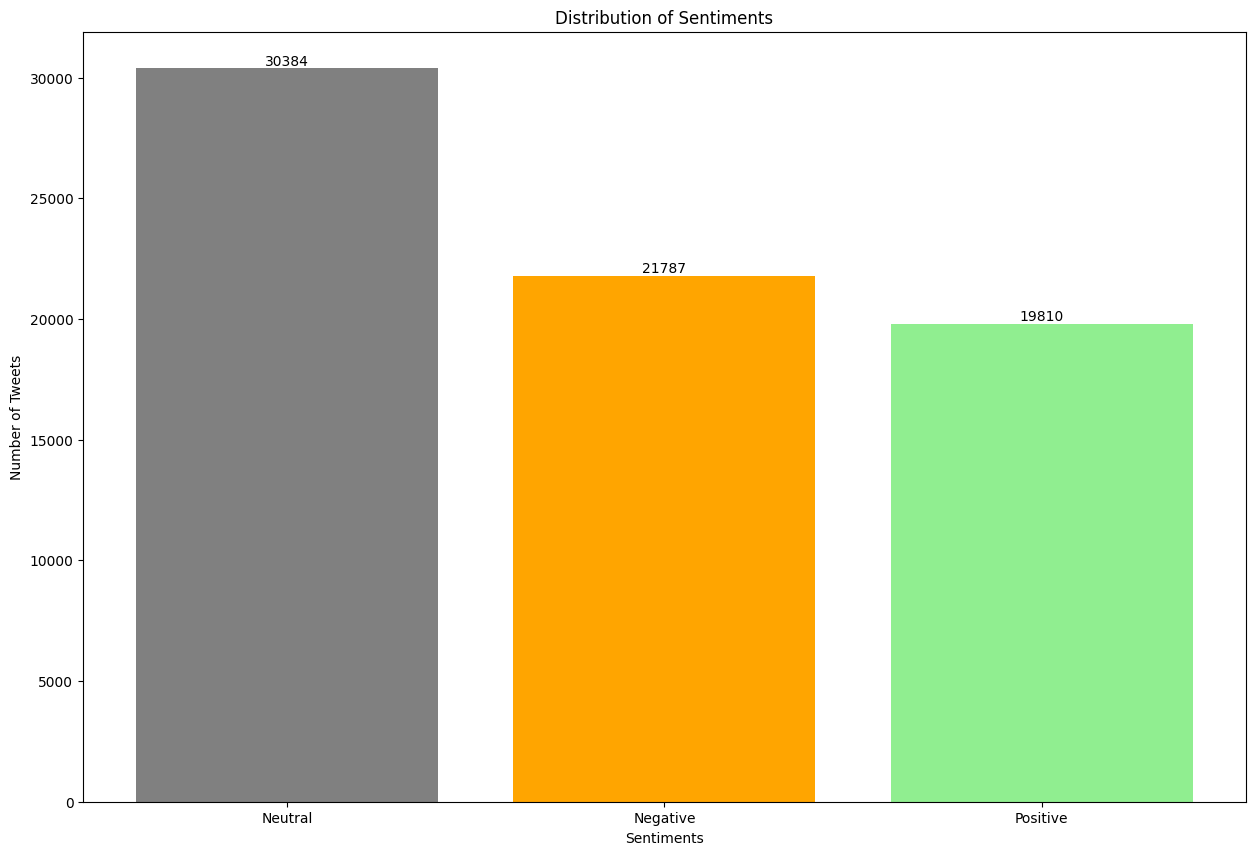

In [48]:
# Barplot showing the distribution of Sentiments
plt.figure(figsize=(15, 10))
barplot = plt.bar(train_df['Sentiment'].value_counts().index, train_df['Sentiment'].value_counts().values, color=['grey', 'orange', 'lightgreen'])

plt.title("Distribution of Sentiments")
plt.xlabel("Sentiments")
plt.ylabel("Number of Tweets")
plt.bar_label(barplot, label_type='edge')
plt.show()

In [ ]:
# Identified the top 20 words with the highest frequency

word_frequencies = train_df.drop(columns=['Sentiment']).sum()
top_words = word_frequencies.sort_values(ascending=False).head(20)
print(f'Top 20 words with the highest frequency: \n{top_words}')

Top 20 words with the highest frequency: 
game       10229
just        6572
wa          5351
like        4874
im          4818
ha          3664
play        3537
good        3473
time        3428
love        3213
really      3209
new         3166
u           2918
people      2884
johnson     2862
shit        2710
dont        2623
got         2511
best        2451
player      2365
dtype: Sparse[int64, 0]


### Model Training and Testing
- Logistic Regression, Naive Bayes, SVM, Random Forest

In [49]:
# Replace Sentiment values with numerical values
train_df["Sentiment"].replace({"Neutral": 0, "Negative": 1, "Positive": 2}, inplace=True)
test_df["Sentiment"].replace({"Neutral": 0, "Negative": 1, "Positive": 2}, inplace=True)
train_df["Sentiment"].value_counts()

Sentiment
0    30384
1    21787
2    19810
Name: count, dtype: int64

In [50]:
# Split dataset into features and targets
X = train_df.drop("Sentiment", axis=1)
y = train_df["Sentiment"]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(57584, 13203)
(14397, 13203)
(57584,)
(14397,)


##### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, multi_class='auto',random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [54]:
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 0, ..., 2, 2, 1])

In [55]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'Accuracy score: {accuracy}')

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      6114
           1       0.82      0.80      0.81      4298
           2       0.80      0.76      0.78      3985

    accuracy                           0.80     14397
   macro avg       0.80      0.80      0.80     14397
weighted avg       0.80      0.80      0.80     14397

Accuracy score: 0.8023199277627283


##### Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
y_pred = rf.predict(X_test)
y_pred

array([2, 0, 0, ..., 2, 2, 1])

In [58]:
print(classification_report(y_test, y_pred))
print(f'Accuracy score: {accuracy}')

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6114
           1       0.92      0.90      0.91      4298
           2       0.91      0.87      0.89      3985

    accuracy                           0.90     14397
   macro avg       0.90      0.90      0.90     14397
weighted avg       0.90      0.90      0.90     14397

Accuracy score: 0.8023199277627283


##### Support Vector Machine (SVM)

In [59]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=42)
svc.fit(X_train, y_train)

LinearSVC(random_state=42)

In [60]:
y_pred = svc.predict(X_test)
y_pred

array([1, 0, 0, ..., 2, 2, 1])

In [61]:
print(classification_report(y_test, y_pred))
print(f'Accuracy score: {accuracy}')

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      6114
           1       0.83      0.82      0.82      4298
           2       0.80      0.78      0.79      3985

    accuracy                           0.82     14397
   macro avg       0.82      0.81      0.82     14397
weighted avg       0.82      0.82      0.82     14397

Accuracy score: 0.8023199277627283


##### Native Bayes (Bernoulli)

In [62]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train, y_train)

BernoulliNB()

In [63]:
y_pred = nb.predict(X_test)
y_pred

array([1, 1, 2, ..., 2, 2, 1])

In [64]:
print(classification_report(y_test, y_pred))
print(f'Accuracy score: {accuracy}')

              precision    recall  f1-score   support

           0       0.80      0.65      0.72      6114
           1       0.74      0.73      0.74      4298
           2       0.62      0.81      0.70      3985

    accuracy                           0.72     14397
   macro avg       0.72      0.73      0.72     14397
weighted avg       0.73      0.72      0.72     14397

Accuracy score: 0.8023199277627283
